In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# tension based model -> reading

In [9]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)


In [5]:
X_train =[]
y_train =[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [11]:
X_train.shape

(1198, 60)

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [13]:
X_train.shape

(1198, 60, 1)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
regressor = Sequential()

In [19]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))

In [20]:
regressor.add(Dropout(0.2))

In [23]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [24]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [25]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [26]:
regressor.add(Dense(units=1))

In [27]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [28]:
regressor.fit(X_train,y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0554
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0081
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0062
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0057
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0050
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0056
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0049
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 7s 6ms/step - 

In [30]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [34]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis =0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test=[]
for i in range(60,80):
        X_test.append(inputs[i-60:i,0])

In [38]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

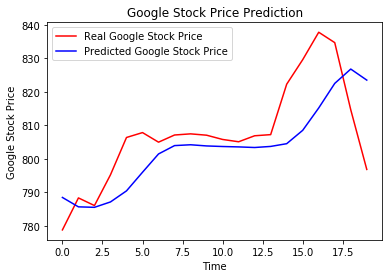

In [40]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price,color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()